In [1]:
import pandas as pd

<font color= yellow> Creando Agrupaciones

In [2]:
datos = pd.read_csv('data/alquiler_residencial.csv', sep=';')
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Tipo agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,Departamento
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,Departamento
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,Casa
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,Casa
7,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,Departamento
8,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0,Departamento
9,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0,Departamento


In [3]:
# Mostra la media aritmetica de un campo
datos['Valor'].mean()

5159.318636548821

Extraer la media segun los distritos dados

In [5]:
distrito = ['Ate', 'Barranco', 'Comas', 'Lince', 'El Agustino', 'San Luis', 'Callao']
seleccion = datos['Distrito'].isin(distrito)
seleccion

0        False
1        False
2        False
3         True
4         True
         ...  
22086    False
22087    False
22088     True
22089    False
22090    False
Name: Distrito, Length: 22091, dtype: bool

In [9]:
datos_1 = datos[seleccion]
datos_1.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Tipo agrupado
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,Departamento
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,Departamento
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,Casa
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,Casa
12,Casa en condominio,San Luis,3,1,1,115,2000.0,0.0,0.0,Casa
13,Departamento,Callao,3,0,0,54,950.0,300.0,28.0,Departamento
14,Departamento,Ate,2,1,1,67,1700.0,589.0,147.0,Departamento
16,Casa en condominio,Ate,4,3,2,466,7500.0,2695.0,0.0,Casa
19,Departamento,Comas,3,1,1,125,7000.0,2100.0,463.0,Departamento
21,Departamento,Ate,3,3,1,175,4200.0,1500.0,500.0,Departamento


In [11]:
# mostra los distritos o barrios unicos
datos_1['Distrito'].drop_duplicates()

3              Ate
4            Comas
6      El Agustino
12        San Luis
13          Callao
22           Lince
174       Barranco
Name: Distrito, dtype: object

In [20]:
# Agrupar los distrititos 
grupo_distrito = datos_1.groupby('Distrito')
type(grupo_distrito)

pandas.core.groupby.generic.DataFrameGroupBy

In [21]:
# Mostrar en un diccionario como estan agrupados segun el nombre de cada distrito
grupo_distrito.groups

{'Ate': [3, 5, 14, 16, 21, 30, 32, 35, 42, 43, 61, 62, 63, 65, 69, 75, 80, 82, 94, 108, 111, 113, 118, 131, 133, 137, 152, 155, 157, 167, 168, 175, 188, 191, 210, 217, 224, 227, 236, 239, 242, 247, 262, 268, 277, 279, 294, 295, 296, 298, 305, 311, 314, 329, 339, 340, 349, 364, 370, 372, 378, 384, 391, 393, 404, 416, 436, 437, 439, 440, 443, 453, 456, 467, 468, 470, 478, 481, 489, 500, 506, 509, 517, 523, 543, 544, 545, 546, 549, 553, 558, 560, 561, 562, 592, 595, 596, 598, 602, 604, ...], 'Barranco': [174, 1043, 1178, 1696, 2019, 2104, 2655, 3015, 3306, 3724, 4796, 4837, 5535, 6515, 7826, 9170, 9638, 9679, 9976, 10227, 10944, 11176, 11496, 11607, 11836, 12265, 12332, 12346, 12906, 13528, 13615, 14462, 15220, 16226, 16519, 17980, 18917, 18970, 19011, 19737, 21135, 21164, 21183, 21184, 21574, 21619, 21785], 'Callao': [13, 59, 84, 107, 124, 136, 158, 165, 190, 207, 225, 274, 308, 309, 350, 387, 460, 497, 539, 613, 698, 710, 794, 826, 876, 897, 986, 1121, 1125, 1377, 1468, 1524, 1552, 1556

In [25]:
# Conocer la media aritmetica del tipo 'Valor' de cada distrito o barrio
for barrio, data in grupo_distrito:
   print(f"{barrio} --> {data['Valor'].mean()}")

Ate --> 6960.983080808081
Barranco --> 1403.8297872340424
Callao --> 4915.27950310559
Comas --> 8823.798661174047
El Agustino --> 1152.6694915254238
Lince --> 1736.1036931818182
San Luis --> 1980.7324675324676


In [30]:
# Conocer la media aritmetica del tipo 'Valor' de cada distrito o barrio, mas fácil
grupo_distrito['Valor'].mean()

Distrito
Ate            6960.983081
Barranco       1403.829787
Callao         4915.279503
Comas          8823.798661
El Agustino    1152.669492
Lince          1736.103693
San Luis       1980.732468
Name: Valor, dtype: float64

In [28]:
# Conocer la media aritmetica del tipo 'Valor' y 'Mantenimiento' de cada distrito o barrio
grupo_distrito[['Valor', 'Mantenimiento']].mean()

,Valor,Mantenimiento
Distrito,,
Ate,6960.983081,3508.325505
Barranco,1403.829787,324.893617
Callao,4915.279503,674.362319
Comas,8823.798661,2076.438723
El Agustino,1152.669492,179.830508
Lince,1736.103693,379.193182
San Luis,1980.732468,460.677922


<font color= yellow> Estadisticas Descriptivas

In [34]:
# Generar varias estadisticas de la columna 'Valor'
grupo_distrito['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Distrito,,,,,,,,
Ate,3960.0,6960.98,11806.44,560.0,2500.0,4300.0,8500.0,600000.0
Barranco,47.0,1403.83,1496.62,450.0,800.0,1100.0,1200.0,8000.0
Callao,483.0,4915.28,44046.80,500.0,1200.0,1700.0,2250.0,800000.0
Comas,1942.0,8823.80,8651.78,400.0,3800.0,6500.0,10000.0,100000.0
El Agustino,118.0,1152.67,750.33,500.0,800.0,1000.0,1200.0,5500.0
Lince,704.0,1736.10,2597.55,300.0,850.0,1200.0,1800.0,45000.0
San Luis,385.0,1980.73,2751.22,500.0,1000.0,1400.0,2000.0,45000.0


Extrae las estadisticas que quiero visualizar

In [37]:
grupo_distrito['Valor'].aggregate(['min', 'max']).rename(columns={'min':'Minimo', 'max':'Maximo'})

,Minimo,Maximo
Distrito,,
Ate,560.0,600000.0
Barranco,450.0,8000.0
Callao,500.0,800000.0
Comas,400.0,100000.0
El Agustino,500.0,5500.0
Lince,300.0,45000.0
San Luis,500.0,45000.0


Hay alquileres que tienen precios muy altos por lo tanto puede ser un error, tener en cuenta que son miles de datos y hay mas distritos en el dataframe datos

Por lo tanto es recomendable trabajar con la biblioteca MatPlot para poder visualizar los datosb

In [71]:
distrito_total = datos
distrito_total['Distrito'].drop_duplicates()
grupo_distrito_total = distrito_total.groupby('Distrito')

In [42]:
# '%matplotlib inline': permite que las visualizaciones generadas con matplotlib se muestren directamente en el cuaderno, justo debajo de la celda de código que las produce.
%matplotlib inline
import matplotlib.pyplot as plt

In [43]:
# configurar el tamaño predeterminado de las figuras en las visualizaciones de matplotlib
plt.rc('figure', figsize = (20,10))

Mostrar la media de los alquilers en todos los distritos

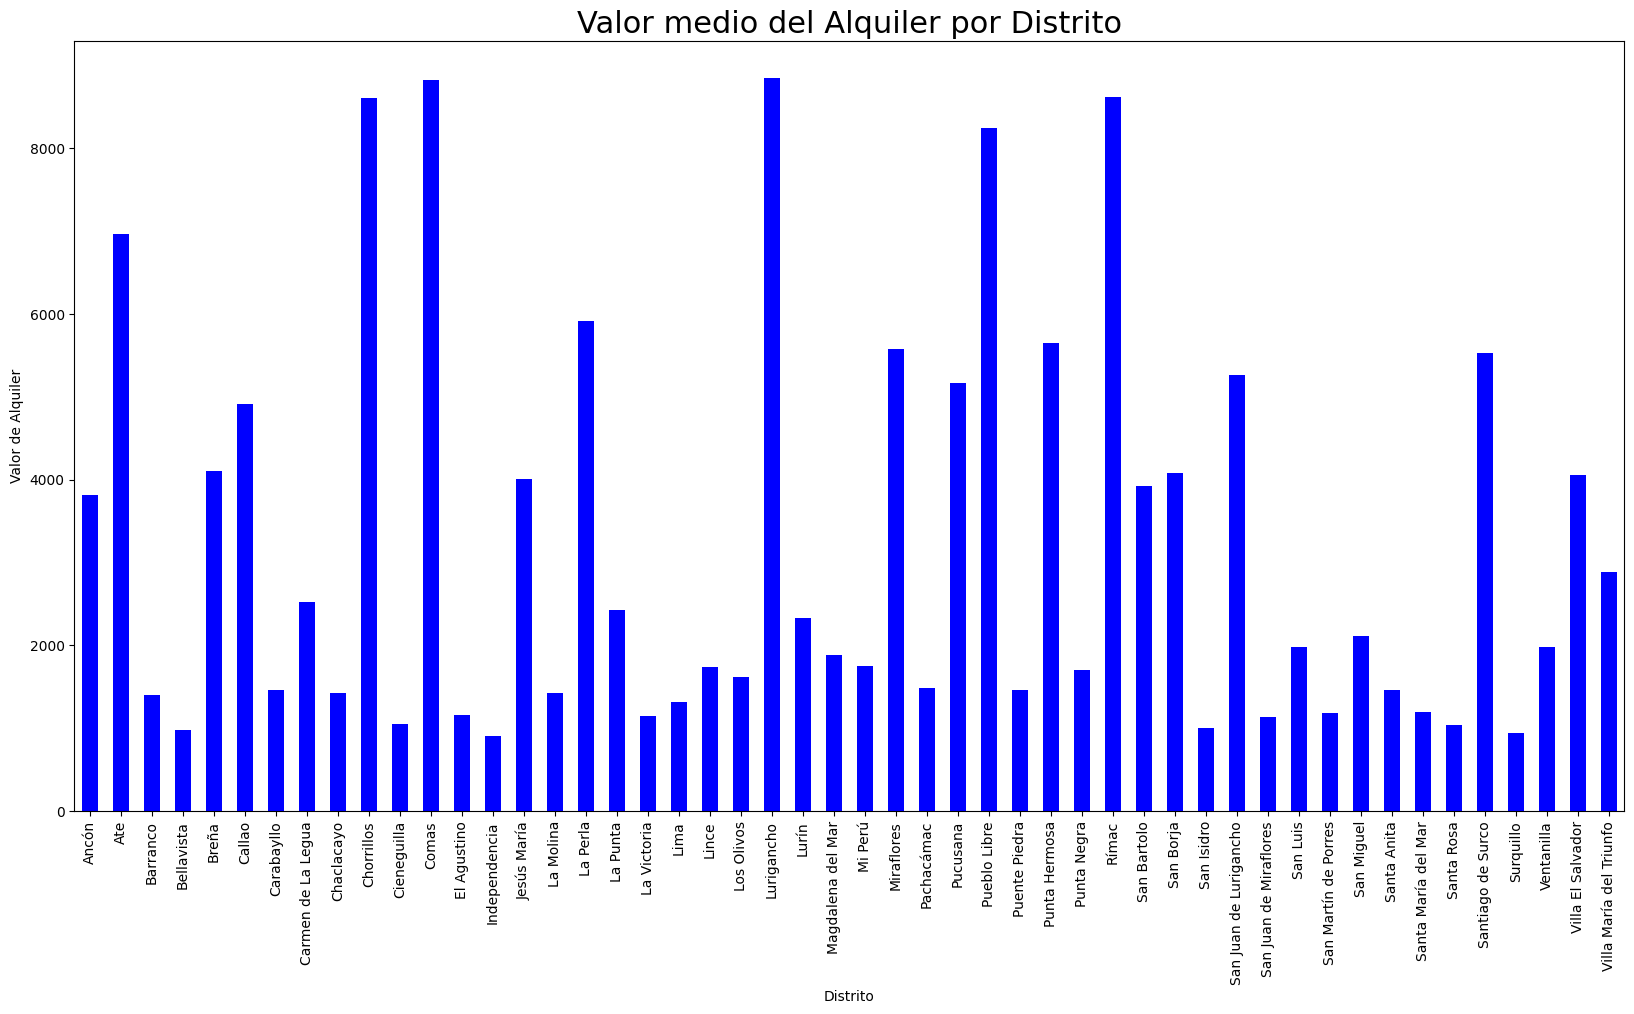

In [72]:
# Crea el gráfico de barras
fig = grupo_distrito_total['Valor'].mean().plot.bar(color='blue')

# Añade etiquetas y título
fig.set_ylabel('Valor de Alquiler')
fig.set_title('Valor medio del Alquiler por Distrito', {'fontsize': 22})

# Muestra el gráfico
plt.show()

Mostrar el valor maximo de los alquilers en todos los distritos

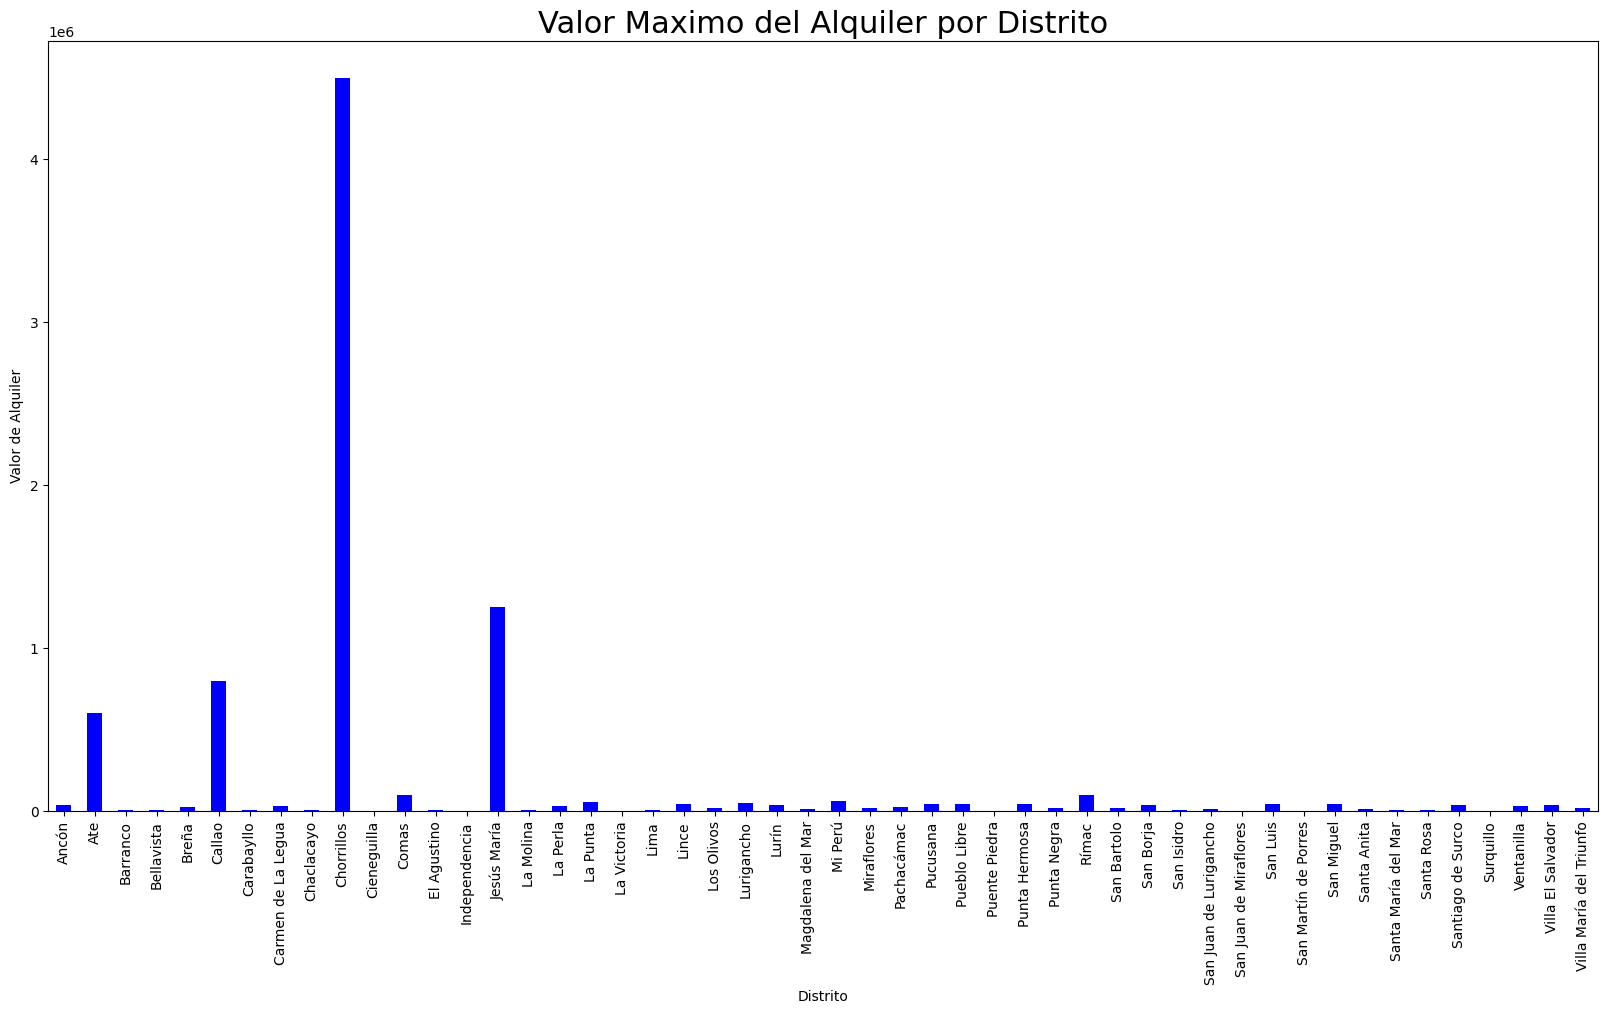

In [74]:
# Crea el gráfico de barras
fig = grupo_distrito_total['Valor'].max().plot.bar(color='blue')

# Añade etiquetas y título
fig.set_ylabel('Valor de Alquiler')
fig.set_title('Valor Maximo del Alquiler por Distrito', {'fontsize': 22})

# Muestra el gráfico
plt.show()